In [1]:
import sys
import os
import math
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)


from electronTransportCode.Material import Material, WaterMaterial
from electronTransportCode.ProjectUtils import FSC, ERE
%matplotlib widget

In [2]:

Z, r0, beta, tau, mu = sy.symbols('Z, r0, beta, tau, mu')  # type: ignore
eta = sy.symbols('eta', positive=True)  # type: ignore
sigma = (sy.pi*(r0*Z)**2)/((beta**2)*tau*(tau+2)*eta*(eta+1))
dsigmadmu = (2*sy.pi*(r0*Z)**2)/((beta**2)*tau*(tau+2)*(1-mu+2*eta)**2)
pdf = dsigmadmu/sigma


In [3]:
print(pdf)
print(f'Indeed pdf is normalized: int(pdf, (mu, -1, 1)) = {sy.simplify(sy.integrate(pdf, (mu, -1, 1)))}')
exp = sy.integrate(mu*pdf, (mu, -1, 1))
print(f'Mean: {sy.simplify(exp)}')


2*eta*(eta + 1)/(2*eta - mu + 1)**2
Indeed pdf is normalized: int(pdf, (mu, -1, 1)) = 1
Mean: -eta*(2*eta + 2*(eta + 1)*log(-2*eta - 2) + 1) + (eta + 1)*(2*eta*log(-2*eta) + 2*eta + 1)


In [4]:

def getEta(Ekin: float, material: Material) -> float:
    temp = Ekin*(Ekin+2)
    betaSquared = temp/((Ekin+1)**2)
    eta0 = material.etaCONST2/temp
    return eta0*(1.13 + 3.76*((FSC*material.Z)**2)/betaSquared)

def getMeanMu(Ekin: float, material: Material) -> float:
    temp = Ekin*(Ekin+2)
    betaSquared = temp/((Ekin+1)**2)
    eta0 = material.etaCONST2/temp
    eta = eta0*(1.13 + 3.76*((FSC*material.Z)**2)/betaSquared)
    return eta*(eta+1)*(1/eta + 1/(eta+1) + 2*math.log(eta) - 2*math.log(eta+1))


In [5]:
eta = getEta(10/ERE, WaterMaterial)
muRange = np.linspace(-1, 1, 100)
pdfs = 2*eta*(eta + 1)/np.power(2*eta - muRange + 1, 2)


Text(0, 0.5, 'pdf')

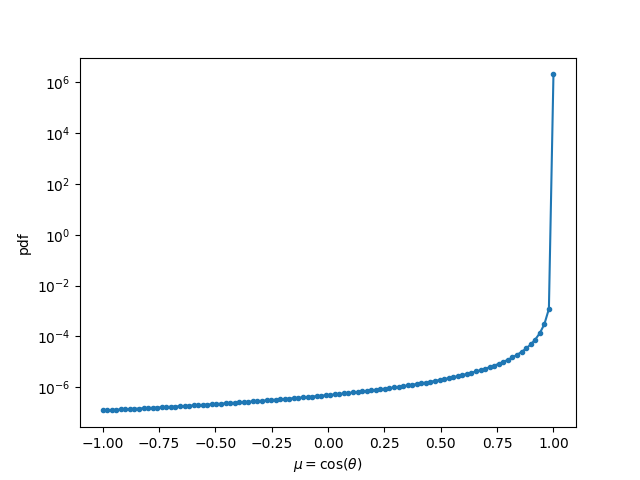

In [6]:
fig, ax = plt.subplots()
ax.semilogy(muRange, pdfs, '.-')
ax.set_xlabel('$\mu = \cos(\\theta)$')
ax.set_ylabel('pdf')

In [7]:
emin = 1e-3
emax = 21/ERE
eRange = np.linspace(emin, emax, 200)
Ecost = np.array([getMeanMu(energy, WaterMaterial) for energy in eRange], dtype=float)

Text(0, 0.5, '$E[\\cos(\\theta)]$')

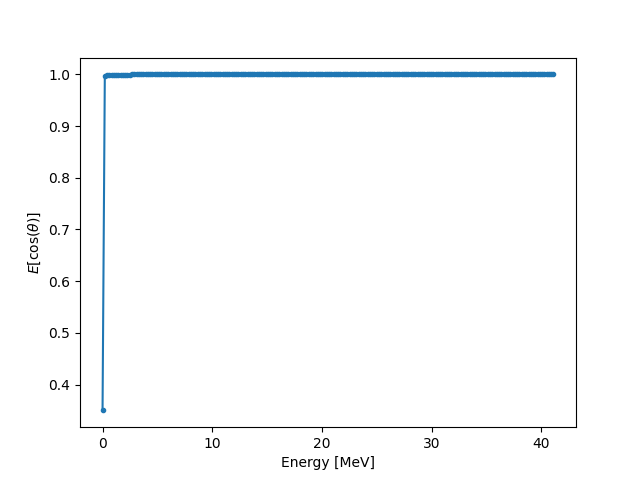

In [8]:
fig, ax = plt.subplots()
ax.plot(eRange, Ecost, '.-')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('$E[\cos(\\theta)]$')

In [9]:
Ecost

array([0.34992546, 0.99652544, 0.99826945, 0.99887948, 0.9991903 ,
       0.99937758, 0.9995019 , 0.99958983, 0.99965491, 0.99970474,
       0.99974391, 0.99977538, 0.9998011 , 0.99982244, 0.99984037,
       0.9998556 , 0.99986866, 0.99987996, 0.99988981, 0.99989845,
       0.99990608, 0.99991285, 0.99991888, 0.9999243 , 0.99992917,
       0.99993357, 0.99993756, 0.99994119, 0.9999445 , 0.99994753,
       0.99995031, 0.99995288, 0.99995524, 0.99995742, 0.99995945,
       0.99996133, 0.99996307, 0.9999647 , 0.99996622, 0.99996765,
       0.99996898, 0.99997023, 0.9999714 , 0.9999725 , 0.99997354,
       0.99997452, 0.99997545, 0.99997632, 0.99997715, 0.99997793,
       0.99997867, 0.99997938, 0.99998005, 0.99998069, 0.99998129,
       0.99998187, 0.99998242, 0.99998295, 0.99998345, 0.99998393,
       0.99998438, 0.99998482, 0.99998524, 0.99998564, 0.99998603,
       0.9999864 , 0.99998676, 0.9999871 , 0.99998742, 0.99998774,
       0.99998804, 0.99998833, 0.99998862, 0.99998889, 0.99998